In [32]:
import numpy as np

def cognateDistrib(ptRNA):

    ptRNA = np.divide(ptRNA,sum(ptRNA))

    tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
    "Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
    "Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
    "Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]

    ptRNA_dict = dict(zip(tRNA_tags, ptRNA))

    codons_Ec = ["GGG", "GGA", "GGU", "GGC", "GAG", "GAA", "GAU", "GAC", "GUG", "GUA", "GUU", \
    "GUC", "GCG", "GCA", "GCU", "GCC", "AGG", "AGA", "AGU", "AGC", "AAG", "AAA", \
    "AAU", "AAC", "AUG", "AUA", "AUU", "AUC", "ACG", "ACA", "ACU", "ACC", "UGG", \
    "UGA", "UGU", "UGC", "UAU", "UAC", "UUG", "UUA", "UUU", "UUC", "UCG", "UCA", \
    "UCU", "UCC", "CGG", "CGA", "CGU", "CGC", "CAG", "CAA", "CAU", "CAC", "CUG", \
    "CUA", "CUU", "CUC", "CCG", "CCA", "CCU", "CCC"]

    pcodons_Ec =[0.00483, 0.00272, 0.03847, 0.03579, 0.01665, 0.05335, 0.02436, \
    0.02885, 0.02150, 0.01594, 0.03146, 0.01130, 0.03047, 0.02223, \
    0.02898, 0.01989, 0.00009, 0.00113, 0.00401, 0.01203, 0.01214, \
    0.04464, 0.00984, 0.02808, 0.02247, 0.00093, 0.02148, 0.03685, \
    0.00757, 0.00350, 0.01394, 0.02663, 0.00981, 0.00031, 0.00425, \
    0.00531, 0.01073, 0.01628, 0.00666, 0.00616, 0.01261, 0.02279, \
    0.00608, 0.00391, 0.01318, 0.01120, 0.00176, 0.00133, 0.03126, \
    0.02235, 0.02938, 0.01024, 0.00927, 0.01396, 0.06041, 0.00216, \
    0.00573, 0.00622, 0.02965, 0.00655, 0.00501, 0.00332]
    pcodons_Ec = np.divide(pcodons_Ec,sum(pcodons_Ec))

    pcodon_dict = dict(zip(codons_Ec, pcodons_Ec))

    #Note AUA does not have an assigned tRNA
    codon_dict={'GGG': ['Gly2'], 'GGA': ['Gly2'], 'GGU': ['Gly3'], 'GGC': ['Gly3'], \
    'GAG': ['Glu2'], 'GAA': ['Glu2'], 'GAU': ['Asp1'], 'GAC': ['Asp1'], \
    'GUG': ['Val1'], 'GUA': ['Val1'], 'GUU': ['Val1','Val2ApB'], \
    'GUC': ['Val2ApB'], 'GCG': ['Ala1B'], 'GCA': ['Ala1B'], 'GCU': ['Ala1B'], \
    'GCC': ['Ala2'], 'AGG': ['Arg5'], 'AGA': ['Arg4'], 'AGU': ['Ser3'], \
    'AGC': ['Ser3'], 'AAG': ['Lys'], 'AAA': ['Lys'], 'AAU': ['Asn'], \
    'AAC': ['Asn'], 'AUG': ['Met_m'], 'AUA': [], 'AUU': ['Ile1'], \
    'AUC': ['Ile1'], 'ACG': ['Thr2','Thr4'], 'ACA': ['Thr4'], \
    'ACU': ['Thr1','Thr4','Thr3'], 'ACC': ['Thr3','Thr1'], \
    'UGG': ['Trp'], 'UGA': ['Sel_Cys'], 'UGU': ['Cys'], 'UGC': ['Cys'], \
    'UAU': ['Tyr1pTyr2'], 'UAC': ['Tyr1pTyr2'], 'UUG': ['Leu5','Leu4'], \
    'UUA': ['Leu5'], 'UUU': ['Phe'], 'UUC': ['Phe'], 'UCG': ['Ser1','Ser2'], \
    'UCA': ['Ser1'], 'UCU': ['Ser5','Ser1'], 'UCC': ['Ser5'], 'CGG': ['Arg3'], \
    'CGA': ['Arg2'], 'CGU': ['Arg2'], 'CGC': ['Arg2'], 'CAG': ['Gln2'], \
    'CAA': ['Gln1'], 'CAU': ['His'], 'CAC': ['His'], 'CUG': ['Leu1','Leu3'], \
    'CUA': ['Leu3'], 'CUU': ['Leu2'], 'CUC': ['Leu2'], 'CCG': ['Pro1','Pro3'], \
    'CCA': ['Pro3'], 'CCU': ['Pro2','Pro3'], 'CCC': ['Pro2']}

    cells = 1
    TU = 9500*20
    time = 180
    tRNA_distrib_arr = list()
    codon_count = {}
    codon_time = {}
    codon_time_avg = {}
    codon_time_weighted_avg={}
    codon_count_hist = {}
    codon_count_hist_weighted_avg = np.zeros(42)
    p_codon_tRNA = {}

    for key in codon_dict:
        codon_count[key] = []
        codon_time[key] = []
        codon_time_avg[key] = []
        codon_time_weighted_avg[key]=[]
        codon_count_hist[key]=[]
        p_codon_tRNA[key] = []

    # Construct dictionary that assigns probability of all tRNA specific to a certain codon
    # to that codon (p_codon_tRNA)
    for codon in codon_dict:
        p_codon_tRNA_i = 0
        for tRNA in codon_dict[codon]:
            p_codon_tRNA_i += ptRNA_dict[tRNA]
        p_codon_tRNA[codon].append(p_codon_tRNA_i)

    for cell in range(cells):
        # Generate distribution for cognate tRNA count for each codon
        for i in range(TU):

            #Construct translation unit with random tRNA (weighted by specific tRNA abundances)
            #and 1 random codon (weighted by codon probabilities).
            tRNA_vox = list(np.random.choice(tRNA_tags,42,p=ptRNA))
            codon_vox = np.random.choice(codons_Ec, 1)

            #Count how many cognate tRNA appeared in the translation unit (for given codon) and record in codon_count
            codon_count_i = 0
            for tRNA in codon_dict[codon_vox[0]]:
                codon_count_i += tRNA_vox.count(tRNA)
            codon_count[codon_vox[0]].append(codon_count_i)

        for codon in codon_count:
            #Generate histogram of cognate tRNA counts for each codon
            codon_count_hist[codon] = np.histogram(codon_count[codon], bins=np.arange(0,43))[0]/sum(np.histogram(codon_count[codon], bins=np.arange(0,43))[0])

            #Weight histogram by codon probabilities to generate weighted average histogram for all codon
            codon_count_hist_weighted_avg += codon_count_hist[codon]*pcodon_dict[codon]
        p_codon_count_hist_weighted_avg = codon_count_hist_weighted_avg
        #print(p_codon_count_hist_weighted_avg)
    return p_codon_count_hist_weighted_avg

In [54]:
import pandas as pd
WS = pd.read_excel('tRNAValues.xlsx',header=None)
WS_np = np.array(WS)
gr04=WS[0]
gr07=WS[1]
gr107=WS[2]
gr16=WS[3]
gr25=WS[4]

0.9869490272753466
[2.42798969e-01 2.61252793e-01 1.98464426e-01 1.34407858e-01
 8.45589691e-02 4.48883064e-02 2.05777059e-02 8.97518979e-03
 2.96144321e-03 7.97752660e-04 2.34745165e-04 7.60234587e-05
 5.81843527e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.8445000420908948


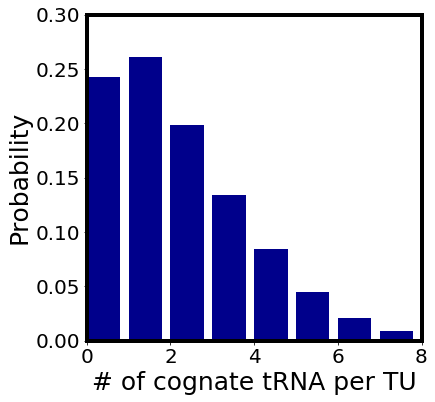

In [40]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

ptRNA = gr04
p_codon_count_hist_weighted_avg=cognateDistrib(ptRNA)

fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.bar(np.arange(0,42),p_codon_count_hist_weighted_avg,linewidth=4,color='darkblue',align='edge')
plt.xlabel('# of cognate tRNA per TU',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.ylim(0,0.3)
plt.xlim(0,8)
print(sum(p_codon_count_hist_weighted_avg[0:7]))
print(p_codon_count_hist_weighted_avg)
print(sum(np.multiply(p_codon_count_hist_weighted_avg,np.arange(0,42))))
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

0.988485366068048
[2.42177742e-01 2.61064137e-01 1.98535063e-01 1.39338765e-01
 8.26319569e-02 4.39161359e-02 2.08215654e-02 7.97713811e-03
 2.35273862e-03 8.82653037e-04 2.96839968e-04 5.26420079e-06
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.836820518241085


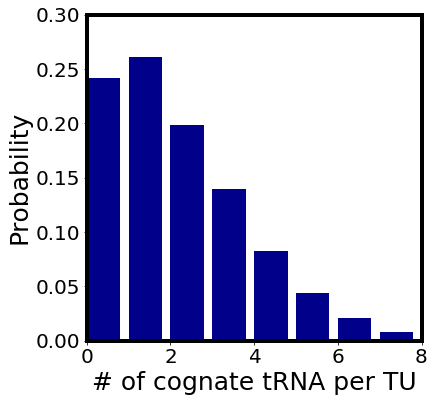

In [45]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

ptRNA = gr07
p_codon_count_hist_weighted_avg=cognateDistrib(ptRNA)

fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.bar(np.arange(0,42),p_codon_count_hist_weighted_avg,linewidth=4,color='darkblue',align='edge')
plt.xlabel('# of cognate tRNA per TU',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.ylim(0,0.3)
plt.xlim(0,8)
print(sum(p_codon_count_hist_weighted_avg[0:7]))
print(p_codon_count_hist_weighted_avg)
print(sum(np.multiply(p_codon_count_hist_weighted_avg,np.arange(0,42))))
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

0.9879477444222748
[2.37966608e-01 2.60994752e-01 2.02782228e-01 1.38866114e-01
 8.41727645e-02 4.26504274e-02 2.05148506e-02 8.12150703e-03
 2.82709050e-03 7.79174264e-04 2.26666629e-04 7.75521364e-05
 0.00000000e+00 2.02650117e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.8460528744317317


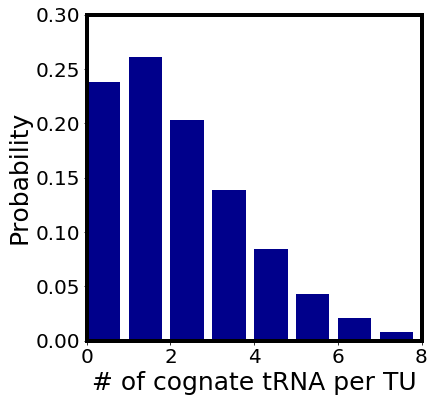

In [46]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

ptRNA = gr107
p_codon_count_hist_weighted_avg=cognateDistrib(ptRNA)

fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.bar(np.arange(0,42),p_codon_count_hist_weighted_avg,linewidth=4,color='darkblue',align='edge')
plt.xlabel('# of cognate tRNA per TU',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.ylim(0,0.3)
plt.xlim(0,8)
print(sum(p_codon_count_hist_weighted_avg[0:7]))
print(p_codon_count_hist_weighted_avg)
print(sum(np.multiply(p_codon_count_hist_weighted_avg,np.arange(0,42))))
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

0.9853410741056869
[2.46608656e-01 2.50884919e-01 1.94020418e-01 1.37022169e-01
 8.74155131e-02 4.78284902e-02 2.15609080e-02 9.56604313e-03
 3.61351942e-03 1.09088780e-03 3.53689935e-04 2.45911765e-05
 1.01944264e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.8777803973453482


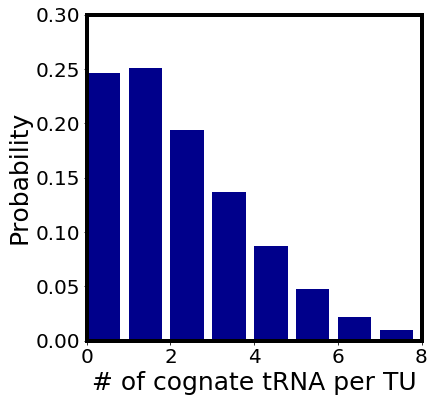

In [47]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

ptRNA = gr16
p_codon_count_hist_weighted_avg=cognateDistrib(ptRNA)

fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.bar(np.arange(0,42),p_codon_count_hist_weighted_avg,linewidth=4,color='darkblue',align='edge')
plt.xlabel('# of cognate tRNA per TU',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.ylim(0,0.3)
plt.xlim(0,8)
print(sum(p_codon_count_hist_weighted_avg[0:7]))
print(p_codon_count_hist_weighted_avg)
print(sum(np.multiply(p_codon_count_hist_weighted_avg,np.arange(0,42))))
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

0.9858521417365802
[2.41299446e-01 2.49654098e-01 1.92333064e-01 1.38455600e-01
 8.95404143e-02 5.01147692e-02 2.44547502e-02 9.56489588e-03
 3.51658872e-03 7.09541458e-04 3.25327989e-04 3.15042135e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
1.9102237111213636


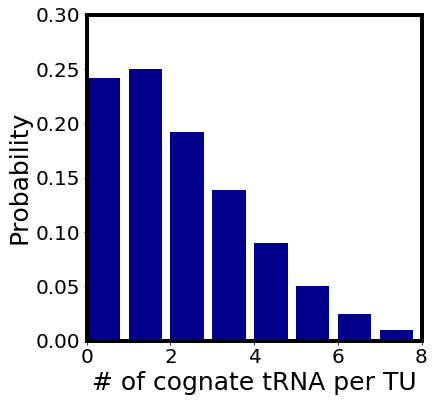

In [53]:
from analysis_utils import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
%matplotlib inline

ptRNA = gr25
p_codon_count_hist_weighted_avg=cognateDistrib(ptRNA)

fig,ax=plt.subplots(1,1,figsize=(6,6))
plt.bar(np.arange(0,42),p_codon_count_hist_weighted_avg,linewidth=4,color='darkblue',align='edge')
plt.xlabel('# of cognate tRNA per TU',fontsize=25)
plt.ylabel('Probability',fontsize=25)
plt.ylim(0,0.3)
plt.xlim(0,8)
print(sum(p_codon_count_hist_weighted_avg[0:7]))
print(p_codon_count_hist_weighted_avg)
print(sum(np.multiply(p_codon_count_hist_weighted_avg,np.arange(0,42))))
plt.gca().spines['left'].set_linewidth(4)
plt.gca().spines['bottom'].set_linewidth(4)
plt.gca().spines['top'].set_linewidth(4)
plt.gca().spines['right'].set_linewidth(4)
plt.gca().tick_params(axis='both', which='major', labelsize=20)

In [55]:
gr04

0     0.050584
1     0.009339
2     0.073930
3     0.010117
4     0.013230
5     0.006226
6     0.018677
7     0.037354
8     0.024903
9     0.011673
10    0.014008
11    0.073152
12    0.033463
13    0.067704
14    0.010117
15    0.053696
16    0.069261
17    0.014786
18    0.010117
19    0.029572
20    0.017899
21    0.029572
22    0.018677
23    0.016342
24    0.014008
25    0.010895
26    0.009339
27    0.003113
28    0.020233
29    0.005447
30    0.021790
31    0.011673
32    0.001556
33    0.008560
34    0.017121
35    0.014008
36    0.014786
37    0.031128
38    0.059922
39    0.020233
Name: 0, dtype: float64

In [56]:
gr25

0     0.058565
1     0.010249
2     0.071742
3     0.005857
4     0.010249
5     0.005857
6     0.020498
7     0.042460
8     0.020498
9     0.011713
10    0.017570
11    0.081991
12    0.030747
13    0.070278
14    0.011713
15    0.068814
16    0.061493
17    0.016105
18    0.008785
19    0.026354
20    0.010249
21    0.029283
22    0.027818
23    0.014641
24    0.007321
25    0.010249
26    0.007321
27    0.002928
28    0.020498
29    0.004392
30    0.016105
31    0.011713
32    0.001464
33    0.008785
34    0.016105
35    0.019034
36    0.014641
37    0.026354
38    0.057101
39    0.019034
Name: 4, dtype: float64